In [2]:
import matplotlib.pyplot as plt # plotting library
import numpy as np # library for numerical calculations
import pandas as pd # library for reading csv files
import seaborn as sns
import keras 
import joblib #library for saving model

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

In [3]:
data = pd.read_csv('song_data_combined_genre_label_final.csv') # loading dataset
data.head() #check if it's loaded correctly
#data.tail() #also check the last few datasets just to be sure

,Track Name,Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,rap,pop,electronic,trap,indie,rnb,rock,dance,reggaeton,Label
0,All I Want for Christmas Is You,Mariah Carey,0.336,0.627,7,-7.463,1,0.0384,0.1640,0.00000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2,-4.757,1,0.1700,0.2090,0.00000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,I Don't Care (with Justin Bieber),Ed Sheeran,0.798,0.675,6,-5.041,1,0.0442,0.0912,0.00000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,7 rings,Ariana Grande,0.725,0.321,1,-10.744,0,0.3230,0.5780,0.00000,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
4,SAD!,XXXTENTACION,0.740,0.613,8,-4.880,1,0.1450,0.2580,0.00372,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [5]:
data.dtypes #check data types

Track Name           object
Artist               object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
Genre                object
hiphop              float64
rap                 float64
pop                 float64
electronic          float64
trap                float64
indie               float64
rnb                 float64
rock                float64
dance               float64
reggaeton           float64
Label                 int64
dtype: object

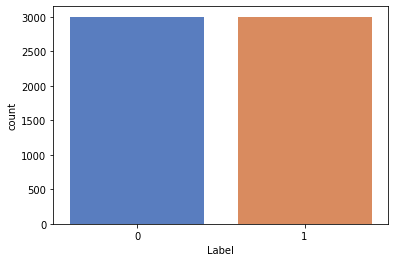

In [6]:
#breakdown by class
sns.countplot(x="Label", data=data, palette="muted");

In [7]:
#clean up data type for Track Name and Artist as they are objects
data['Track Name'] = pd.Categorical(data['Track Name'])
data['Track Name'] = data['Track Name'].cat.codes
data['Artist'] = pd.Categorical(data['Artist'])
data['Artist'] = data['Artist'].cat.codes

In [8]:
data.dtypes #check if clean up data type is successful

Track Name            int16
Artist                int16
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
Genre                object
hiphop              float64
rap                 float64
pop                 float64
electronic          float64
trap                float64
indie               float64
rnb                 float64
rock                float64
dance               float64
reggaeton           float64
Label                 int64
dtype: object

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Label','Track Name', 'Artist', 'Genre'],1),
                                                    data['Label'],
                                                    test_size=0.2,
                                                    random_state=0) 

In [16]:
#normalise the data which is needed for random forest
from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) #default parameter is 3, 1

In [18]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

def evaluate_on_training_set(y_test, y_pred):
  # Calculate AUC
  print("AUC is: ", roc_auc_score(y_test, y_pred)) #todo print AUC score 
  
  # print out recall and precision
  print(classification_report(y_test, y_pred))
  
  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

  # # calculate points for ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  
  # Plot ROC curve
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_pred))
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  plt.title('Receiver Operating Characteristic')

[0 1 0 ... 0 1 0]
AUC is:  0.8150573741327165
              precision    recall  f1-score   support

           0       0.89      0.72      0.80       616
           1       0.75      0.91      0.83       584

    accuracy                           0.81      1200
   macro avg       0.82      0.82      0.81      1200
weighted avg       0.83      0.81      0.81      1200

Confusion Matrix: 
 [[443 173]
 [ 52 532]]


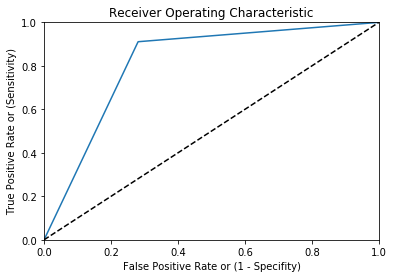

In [32]:
y_pred = model.predict(X_test) # Predicting labels for our test set using model
print (y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function


[Text(390.6, 570.7800000000001, 'X[7] <= 0.002\ngini = 0.5\nsamples = 4800\nvalue = [2384, 2416]'),
 Text(195.3, 407.70000000000005, 'X[1] <= 0.913\ngini = 0.418\nsamples = 3113\nvalue = [927, 2186]'),
 Text(97.65, 244.62, 'X[14] <= 0.5\ngini = 0.374\nsamples = 2863\nvalue = [714, 2149]'),
 Text(48.825, 81.53999999999996, 'gini = 0.455\nsamples = 1836\nvalue = [644, 1192]'),
 Text(146.47500000000002, 81.53999999999996, 'gini = 0.127\nsamples = 1027\nvalue = [70, 957]'),
 Text(292.95000000000005, 244.62, 'X[14] <= 0.5\ngini = 0.252\nsamples = 250\nvalue = [213, 37]'),
 Text(244.125, 81.53999999999996, 'gini = 0.179\nsamples = 232\nvalue = [209, 23]'),
 Text(341.77500000000003, 81.53999999999996, 'gini = 0.346\nsamples = 18\nvalue = [4, 14]'),
 Text(585.9000000000001, 407.70000000000005, 'X[14] <= 0.5\ngini = 0.235\nsamples = 1687\nvalue = [1457, 230]'),
 Text(488.25, 244.62, 'X[15] <= 0.5\ngini = 0.169\nsamples = 1598\nvalue = [1449, 149]'),
 Text(439.425, 81.53999999999996, 'gini = 0.0

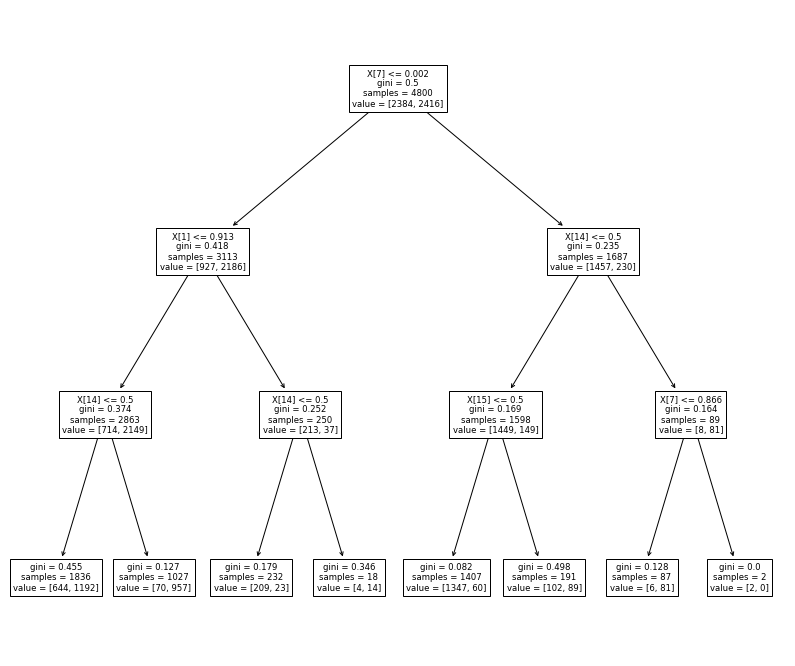

In [33]:
plt.figure(figsize=(14,12))
tree.plot_tree(model)

AUC is:  0.8866749688667498
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       616
           1       0.88      0.89      0.88       584

    accuracy                           0.89      1200
   macro avg       0.89      0.89      0.89      1200
weighted avg       0.89      0.89      0.89      1200

Confusion Matrix: 
 [[546  70]
 [ 66 518]]


['/Users/evansoo/Downloads/random_forest.joblib']

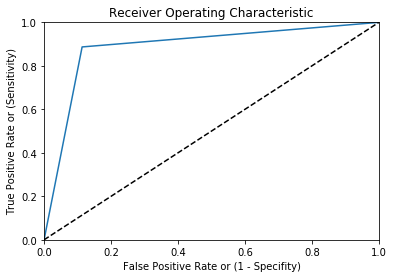

In [34]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 60) # Define the model
#fit the model, predict y and evaluate
model.fit(X_train_norm, y_train) # Training the model

y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function
joblib.dump(model, "/Users/evansoo/Downloads/random_forest.joblib")

In [133]:
#test if loaded model can predict results
loaded_rf = joblib.load("/Users/evansoo/Downloads/random_forest.joblib")
loaded_rf.predict(X_test_norm)

array([0, 1, 0, ..., 0, 1, 0])

AUC is:  0.5700289685252091
              precision    recall  f1-score   support

           0       0.56      0.56      0.56       418
           1       0.58      0.59      0.58       441

    accuracy                           0.57       859
   macro avg       0.57      0.57      0.57       859
weighted avg       0.57      0.57      0.57       859

Confusion Matrix: 
 [[232 186]
 [183 258]]


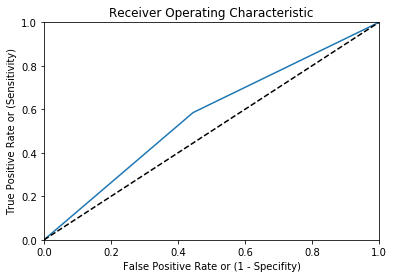